<a href="https://colab.research.google.com/github/Angelo254/Moringa_Data_Science_Core_W7_Independent_Project_2021_10_Angelo_Sang/blob/master/Moringa_Data_Science_Core_W7_Independent_Project_2021_10_Angelo_Sang_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESSION TECHNIQUES:
# Predicting the Price of a House.

### a) Defining the Question

As a Data Scientist, I have been recruited to work for Hass Consulting Company which is a real estate leader with over 25 years of experience. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

### b) Defining the Metric for Success
This project will be successful when:

  1) We Identify the most crucial independent variables that affect house prices. 

  2) The Regression model achieves atleast 80% accuracy

  3) Have the lowest RMSE score possible


### c) Understanding the context 
HassConsult offers investment-grade developments all over the City. The developments have been conceptualized by their development team to be high quality assets using a data-driven approach in planning and design, that gears property for high rental returns and an escalated rate of capital growth.

### d)Experimental Design
The project was undertaken using the following design
Datasets(Independent Project Week 7 - house_data.csv)

* Performing EDA

* Feature Engineering

* Multiple Linear Regression

* Quantile regression

* Ridge Regression

* Lasso Regression

* Elastic-Net Regression

* Computing the RMSE

* Plotting residual plots

* Assess their heteroscedasticity using Barlette's test

* Challenging the solution

* Conclusion

### e) Data Relevance
The relavance of our data will be answered by the following questions.

* How accurate is the data at predicting the Price of a house?

* Was the dataset sufficient?

* Was the data biased?

* Is the data source a reliable source?

## 2. Reading the Data

In [246]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [247]:
#loading the dataset
data = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
data.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [248]:
#obtaining information about the dataset
data.info()
#the data has 20 columns and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [249]:
#describing the data using measures of central tendency(mean,mode and median) and measures
#of dispersion(standard deviation, variance)
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Univariate Analysis

##Price column
This is the dependent variable which we are trying to predict.

In [250]:
#describing the price column in the dataset using measures of central tendency and measures of dispersion
data['price'].describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

##Bedrooms
This column indicates the number of bedrooms in the house

In [251]:
data.bedrooms.nunique()
#There are 13 unique vales for the number of bedrooms in the house
data.bedrooms.unique()
#The unique values are
[ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33]
#data.bedrooms.value_counts()

[3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]

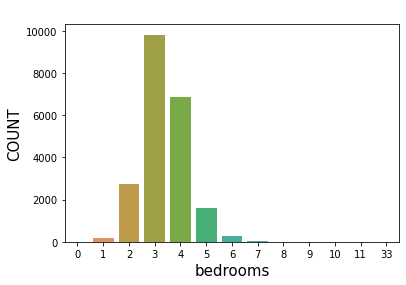

In [252]:
#visualizing the distribution of bedrooms in the dataset
sns.countplot('bedrooms',data = data)
plt.xlabel("bedrooms",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Bedrooms",fontsize=16,color="white")
plt.show()
#The distribution is normal

Text(0.5, 1.0, 'Boxplot of Bedrooms')

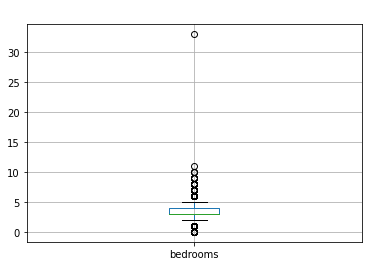

In [253]:
#checking for outliers
data.boxplot(column=['bedrooms'])
plt.title("Boxplot of Bedrooms",fontsize=16,color="white")
#there are a few outliers

In [254]:
#dropping the outlier
#creating a copy
data1 = data
data1.drop(data1.index[data1['bedrooms'] == 33], inplace = True)

In [255]:
#one values has been dropped
data1.shape

(21612, 20)

##Bathrooms Column
This column gives the number of bathrooms in the house

In [256]:
data1.bathrooms.nunique()
#there are 30 unique values
data1.bathrooms.describe()

count    21612.000000
mean         2.114774
std          0.770177
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

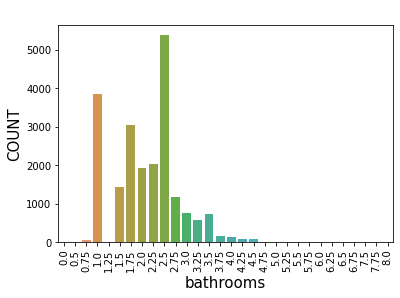

In [257]:
#visualizing the distribution of bathrooms in the dataset
sns.countplot('bathrooms',data = data1)
plt.xlabel("bathrooms",fontsize=15)
plt.tick_params(axis='x', rotation=90)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Bathrooms",fontsize=16,color="white")
plt.show()
#The distribution is right skewed

Text(0.5, 1.0, 'Boxplot of Bathrooms')

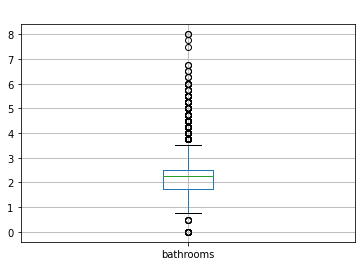

In [258]:
#checking the bathrooms column distribution using a boxplot
data1.boxplot(column=['bathrooms'])
plt.title("Boxplot of Bathrooms",fontsize=16,color="white")

##View Column
The view column shows the number of views that the house has and the value ranges from 0 to 4

In [259]:
#There are 5 unique values for the view column
data1.view.unique()

array([0, 3, 4, 2, 1])

In [260]:
#counting the number of values in the view column.
data1['view'].value_counts()

0    19488
2      963
3      510
1      332
4      319
Name: view, dtype: int64

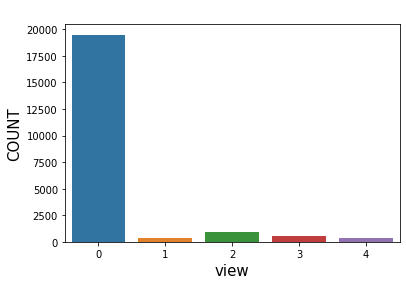

In [261]:
sns.countplot('view', data = data1)
plt.xlabel("view",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of VIEW",fontsize=16,color="white")
plt.show()
#generally, there is a high probability to win a match than lose or draw

90.2 percent of the data in the view column consists of zeros. This column  does not provide alot of information thus we drop it.

In [262]:
#creating a copy
data2 = data1

In [263]:
#Dropping the view column
data2.drop('view', axis=1, inplace=True)
data2.shape


(21612, 19)

View column dropped!

## Waterfront column
Boolean

In [264]:
#The waterfront column is boolean.
# 0 indicates no waterfront while 1 indicates presence of a waterfront
#
data2.waterfront.unique()

array([0, 1])

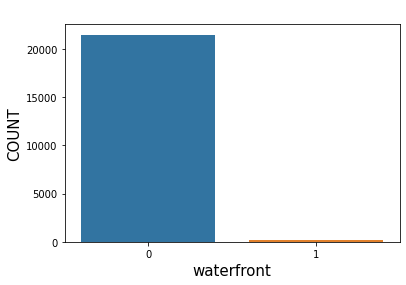

In [265]:
sns.countplot('waterfront',data = data2)
plt.xlabel("waterfront",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of WaterFront",fontsize=16,color="white")
plt.show()
#generally, there is a high probability to win a match than lose or draw

Most of the houses do not have a Waterfront.

##Condition
Ordinal column that ranks the condition of a house from 1 to 5. 1 is a low ranking while 5 is the highest ranking.

In [266]:
data2.condition.unique()
#The condition values from 1 to 5

array([3, 5, 4, 1, 2])

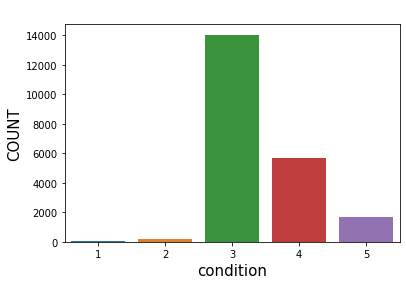

In [267]:
#visualizing the distribution of the condition of houses
sns.countplot('condition',data = data1)
plt.xlabel("condition",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Condition",fontsize=16,color="white")
plt.show()
#The distribution is right skewed

Most of the houses have an above average condition.

##Grade

In [268]:
data2.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

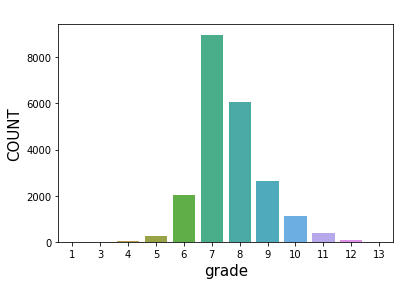

In [269]:
#visualizing the distribution of the condition of houses
sns.countplot('grade',data = data2)
plt.xlabel("grade",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Grade",fontsize=16,color="white")
plt.show()
#The Grade with the highest count is 7 followed by 8.

##Yr_built

In [270]:
data2.yr_built.unique()
#the data is for houses built between 1935 and 1955

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

##Yr_renovated

In [271]:
data2.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [272]:
#creating a copy
data3 = data2

In [273]:
#Dropping the yr_renovated column
data3.drop('yr_renovated', axis=1, inplace=True)
data3.shape

(21612, 18)

95% Percent of the column has zeros. The column does not provide alot of information thus we drop it.

##sqft_living15	and sqft_lot15 column

In [274]:
#Dropping the sqft_living15	and sqft_lot15 column
#creating a copy
data4 = data3
data4.drop(columns=['sqft_living15','sqft_lot15'], axis=1, inplace=True)
data4.shape


(21612, 16)

##Lat	and long columns

In [275]:
#Dropping the lat	and long columns
#creating a copy
data4 = data3
data4.drop(columns=['lat','long'], axis=1, inplace=True)
data4.shape


(21612, 14)

# 7.Bivariate Analysis

In [276]:
data4.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,98178
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,98125
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,98028
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,98136
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,98074


## Checking for Multi-collinearity

In [277]:
# Let's display the correlations between the variables
corr = data4[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',	'waterfront',	'condition','grade','sqft_above','sqft_basement','yr_built',]].corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built
price,1.000000,0.315434,0.525144,0.702055,0.089658,0.256803,0.266332,0.036366,0.667476,0.605589,0.323833,0.053993
bedrooms,0.315434,1.000000,0.529159,0.591467,0.032807,0.181085,-0.006611,0.025478,0.366502,0.490600,0.309490,0.159167
bathrooms,0.525144,0.529159,1.000000,0.754663,0.087735,0.500645,0.063742,-0.124946,0.664979,0.685339,0.283789,0.506012
sqft_living,0.702055,0.591467,0.754663,1.000000,0.172822,0.353937,0.103816,-0.058704,0.762701,0.876597,0.435065,0.318037
sqft_lot,0.089658,0.032807,0.087735,0.172822,1.000000,-0.005210,0.021603,-0.008935,0.113616,0.183507,0.015293,0.053073
floors,0.256803,0.181085,0.500645,0.353937,-0.005210,1.000000,0.023695,-0.263706,0.458171,0.523866,-0.245684,0.489302
waterfront,0.266332,-0.006611,0.063742,0.103816,0.021603,0.023695,1.000000,0.016665,0.082773,0.072072,0.080591,-0.026165
condition,0.036366,0.025478,-0.124946,-0.058704,-0.008935,-0.263706,0.016665,1.000000,-0.144632,-0.158136,0.174057,-0.361380
grade,0.667476,0.366502,0.664979,0.762701,0.113616,0.458171,0.082773,-0.144632,1.000000,0.755919,0.168412,0.446952
sqft_above,0.605589,0.490600,0.685339,0.876597,0.183507,0.523866,0.072072,-0.158136,0.755919,1.000000,-0.051918,0.423879


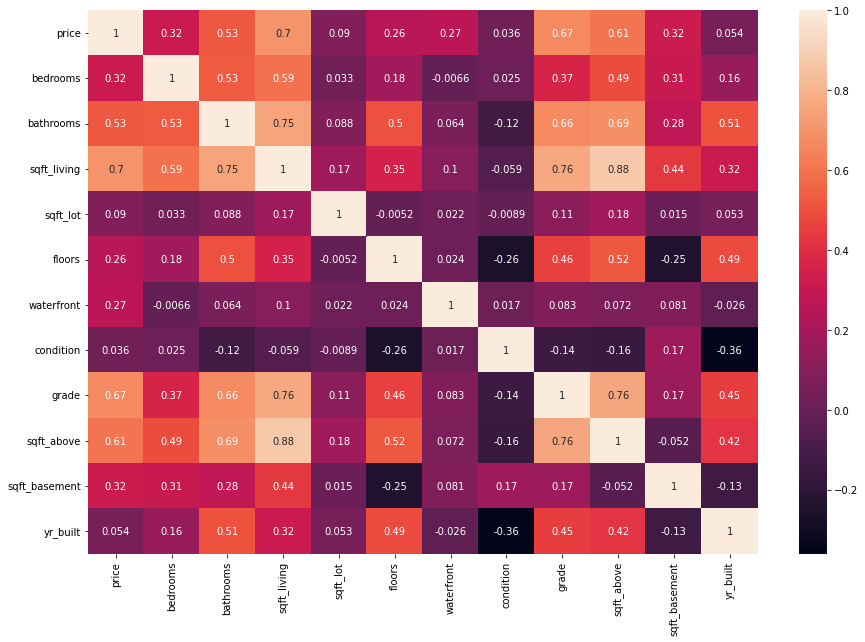

In [278]:
#visualizing correlation on a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)
plt.show()

The heat map above shows VIF values that are very close to 0 meaning that there is very little multi-collinearity.

# Feature Engineering
The columns sqft_above and sqft_living have a very high correlation of 0.88 thus we join the two to form a new column sqft_abv_living

In [279]:
#creating a copy
data5 = data4

data5['sqft_abv_living'] = data5['sqft_above'] + data5['sqft_living']
data5.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_abv_living
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,98178,2360
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,98125,4740
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,98028,1540
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,98136,3010
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,98074,3360


In [280]:
#creating a copy
data6 = data5.drop(columns= ['id','sqft_above','sqft_living'])
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21612 non-null  float64
 1   bedrooms         21612 non-null  int64  
 2   bathrooms        21612 non-null  float64
 3   sqft_lot         21612 non-null  int64  
 4   floors           21612 non-null  float64
 5   waterfront       21612 non-null  int64  
 6   condition        21612 non-null  int64  
 7   grade            21612 non-null  int64  
 8   sqft_basement    21612 non-null  int64  
 9   yr_built         21612 non-null  int64  
 10  zipcode          21612 non-null  int64  
 11  sqft_abv_living  21612 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.8 MB


In [281]:
#obtaining the column names
for col in data6.columns: 
    print(col) 

price
bedrooms
bathrooms
sqft_lot
floors
waterfront
condition
grade
sqft_basement
yr_built
zipcode
sqft_abv_living


In [282]:
X = data6.drop(columns= ['price'])
y = data6['price']

data7 = pd.get_dummies(data6, columns=['waterfront'])
print(X)
print(y)

       bedrooms  bathrooms  sqft_lot  ...  yr_built  zipcode  sqft_abv_living
0             3       1.00      5650  ...      1955    98178             2360
1             3       2.25      7242  ...      1951    98125             4740
2             2       1.00     10000  ...      1933    98028             1540
3             4       3.00      5000  ...      1965    98136             3010
4             3       2.00      8080  ...      1987    98074             3360
...         ...        ...       ...  ...       ...      ...              ...
21608         3       2.50      1131  ...      2009    98103             3060
21609         4       2.50      5813  ...      2014    98146             4620
21610         2       0.75      1350  ...      2009    98144             2040
21611         3       2.50      2388  ...      2004    98027             3200
21612         2       0.75      1076  ...      2008    98144             2040

[21612 rows x 11 columns]
0        221900.0
1        538000.0
2

#Multi-Variate Analysis

In [283]:
#Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)

train_features = X

model = PCA(n_components=11).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = ['bedrooms','bathrooms','sqft_lot','floors','waterfront','condition','grade','sqft_basement','yr_built','zipcode','sqft_abv_living']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,sqft_lot
1,PC1,sqft_abv_living
2,PC2,sqft_basement
3,PC3,zipcode
4,PC4,yr_built
5,PC5,bedrooms
6,PC6,grade
7,PC7,condition
8,PC8,bathrooms
9,PC9,floors


The dataframe above gives an ordered list of how the principal components explain the variance starting from the highest explained variance to the lowest. PC0 explains the most variance while PC10 explains the least Variance.

# **Regression**


##1st Approach: Multiple Linear Regression

In [284]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
# Fit Linear Regression model to the dataset( We are doing this for the
#sole purpose of creating a baseline model to compare the linear regression
# model to the polynomial regression model)

regressor = linear_model.LinearRegression(fit_intercept = True, normalize = True)
regressor.fit(X, y)
# This is our prediction for admission based on our model
print('Intercept: \n', regressor.intercept_)
#The coefficients represent the contribution of the predictor variables in creating the model
print('Coefficients: \n', regressor.coef_)

Intercept: 
 5746931.780670354
Coefficients: 
 [-4.61760698e+04  4.92374106e+04 -2.29686828e-01  2.56947318e+04
  7.16338573e+05  1.80296459e+04  1.29435746e+05  1.03600926e+02
 -3.79249113e+03  8.73243263e+00  8.79441580e+01]


In [285]:
# Linear Model for the  train and test
data8 = data7
# b represents the dependent variable while A represents the independent variables
b = np.log(data8.price)
A = data8.drop(['price'], axis=1)

In [286]:
#splitting the dataset into train and test.
#the test data is 33% while the train data is 67%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    A, b, random_state=42, test_size=.33)

In [287]:
from sklearn import ensemble
lr = ensemble.GradientBoostingRegressor()
model = lr.fit(X_train, y_train)
linear_model =  model.score(X_test, y_test)
linear_model
#the models accuracy is 80.8% meaning that it is a good predictor

0.8080527126472209

In [288]:

y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_pred))
#the mean squared error for the model is quite low hence confirming the previous findings of its predictive 
#capabilities given by the accuracy score

RMSE is: 
 0.054282893490123114


Text(0.5, 1.0, 'Linear Regression Model')

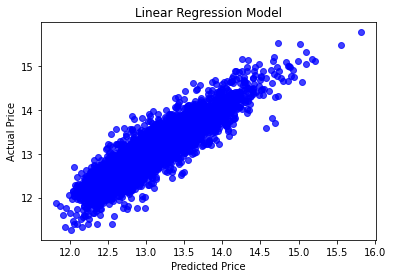

In [290]:
actual_values = y_test
plt.scatter(y_pred, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()

## Checking for Heteroskedasticity using Barlette's Test

In [292]:
from sklearn import linear_model
from sklearn import ensemble

In [294]:
# Using critical value to find the heteroskedasticity
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, y_test)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# comparing the critical value and the test result
if (test_result > critical_value):
 print('the variances are unequal, and the model should be reassessed')
else:
 print('the variances are homogeneous!')

inf
the variances are homogeneous!


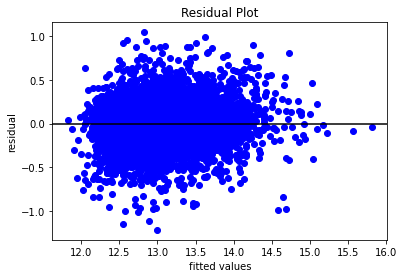

In [295]:
# Plotting the prediction errors

residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

The residual plot above shows a random, clustered pattern around zero, indicating low heteroskedasticity thus,a good fit for the linear model.

In [296]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21612 non-null  float64
 1   bedrooms         21612 non-null  int64  
 2   bathrooms        21612 non-null  float64
 3   sqft_lot         21612 non-null  int64  
 4   floors           21612 non-null  float64
 5   condition        21612 non-null  int64  
 6   grade            21612 non-null  int64  
 7   sqft_basement    21612 non-null  int64  
 8   yr_built         21612 non-null  int64  
 9   zipcode          21612 non-null  int64  
 10  sqft_abv_living  21612 non-null  int64  
 11  waterfront_0     21612 non-null  uint8  
 12  waterfront_1     21612 non-null  uint8  
dtypes: float64(3), int64(8), uint8(2)
memory usage: 2.6 MB


# 2nd Approach: Quantile Regression

In [236]:
#Separating training and testing datasets using numerical data
C = data8.drop(['condition', 'grade','waterfront_0','waterfront_1'], axis=1) 
y = data8['price']

In [237]:
from sklearn.model_selection import train_test_split
C_train, C_test, y_train, y_test = train_test_split(C,y, test_size=0.2, random_state=24)
# importing python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ C', data6)
res = mod.fit(q=.8)
  # Then print out the summary of our model
  #
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:                1.000
Model:                       QuantReg   Bandwidth:                   2.271e-05
Method:                 Least Squares   Sparsity:                    0.0007352
Date:                Sun, 17 Oct 2021   No. Observations:                21612
Time:                        02:13:11   Df Residuals:                    21602
                                        Df Model:                            9
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.556e-10   1.53e-09     -0.167      0.867   -3.25e-09    2.74e-09
C[0]           1.0000   1.37e-11   7.32e+10      0.000       1.000       1.000
C[1]        3.744e-07   3.58e-06      0.105      0.917   -6.65e-06    7.39e-06
C[2]       -1.229e-06   6.07e-06     -0.203      0.8

In [238]:
# Making Predictions
# 
pred = res.predict(C)
# To compare the actual output values for X_test with the predicted values
# 
B1 = pd.DataFrame({'Actual': y, 'Predicted': pred})
B1

,Actual,Predicted
0,221900.0,221900.000253
1,538000.0,538000.000077
2,180000.0,180000.000231
3,604000.0,604000.000065
4,510000.0,510000.000081
...,...,...
21608,360000.0,360000.000226
21609,400000.0,400000.000160
21610,402101.0,402101.000203
21611,400000.0,400000.000192


Using the 0.8 Quantile, The actual scores are very close to the predicted scores indicating that the model is extremely good at predicitng (Almost Perfect)


In [239]:
#Using Quantile 0.2,
from sklearn.model_selection import train_test_split
C_train, C_test, y_train, y_test = train_test_split(C,y, test_size=0.2, random_state=24)
# importing python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ C', data6)
res = mod.fit(q=.2)
  # Then print out the summary of our model
  #
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:                1.000
Model:                       QuantReg   Bandwidth:                   5.233e-06
Method:                 Least Squares   Sparsity:                    0.0001391
Date:                Sun, 17 Oct 2021   No. Observations:                21612
Time:                        02:13:22   Df Residuals:                    21602
                                        Df Model:                            9
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.603e-10   4.14e-10      0.387      0.699   -6.52e-10    9.72e-10
C[0]           1.0000   1.84e-12   5.42e+11      0.000       1.000       1.000
C[1]        4.098e-07   8.74e-07      0.469      0.639    -1.3e-06    2.12e-06
C[2]        6.109e-07   1.42e-06      0.429      0.6

In [240]:
from sklearn.metrics import r2_score
u = r2_score(y, pred)
u

1.0

Using the 0.2 Quantile, The R2 score is 1, the highest possible value for accuracy indicating that the model is extremely good at predicitng (Almost Perfect). This means that we have a case of overfitting hence not a good predictor!

# 3rd Approach: Ridge Regression

In [215]:
# In order to create our ridge model we need to first determine the most appropriate value for
# the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [216]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_train, y_train)
search.best_params_
# {'alpha': 0.001}
 

# The best_params_ tells us what to set alpha too which in this case is 0.001. 
# The best_score_ tells us what the best possible mean squared error is. 

{'alpha': 0.001}

In [217]:
first_model = abs(search.best_score_)
print(first_model)

0.09769255674441647


The RMSE score based on the optimal alpha value is 0.097 which is quite good.

## Hyperparameter Tuning

we try and tune the parameters to see if we can get a better(lower) RMSE score

In [218]:
# We can confirm this by fitting our model with the ridge information and finding the
# mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X_train , y_train)
second_model = (mean_squared_error(y_true= y_test,y_pred=ridge.predict(X_test)))
print(second_model)

0.10169448649294988


In [219]:
ridge = Ridge(normalize=True,alpha=1)
ridge.fit(X_train , y_train)
third_model = (mean_squared_error(y_true= y_test,y_pred=ridge.predict(X_test)))
print(third_model)

0.1286810620804601


In [220]:
ridge = Ridge(normalize=True,alpha=10)
ridge.fit(X_train , y_train)
fourth_model = (mean_squared_error(y_true= y_test,y_pred=ridge.predict(X_test)))
print(fourth_model)

0.22052155581771388


In [221]:
ridge = Ridge(normalize=True,alpha=100)
ridge.fit(X_train , y_train)
fifth_model = (mean_squared_error(y_true= y_test,y_pred=ridge.predict(X_test)))
print(fifth_model)

0.2739194591352993


In [222]:
models = ['0.001','0.01', '1', '10', '100']
model_names = [first_model,second_model,third_model,fourth_model,fifth_model]
con = pd.DataFrame({'Alpha_value': models, 'mean_squared_error': model_names})
con

,Alpha_value,mean_squared_error
0,0.001,0.097693
1,0.01,0.101694
2,1,0.128681
3,10,0.220522
4,100,0.273919


The lowest RMSE score is given by alpha = 0.001

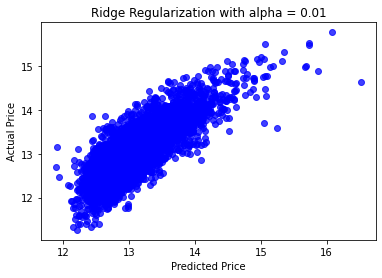

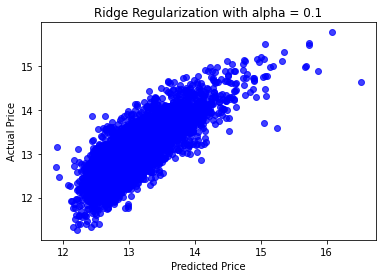

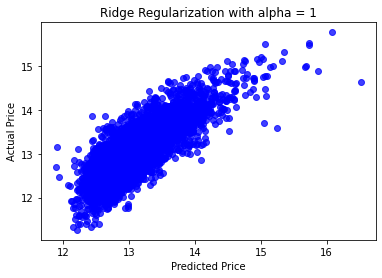

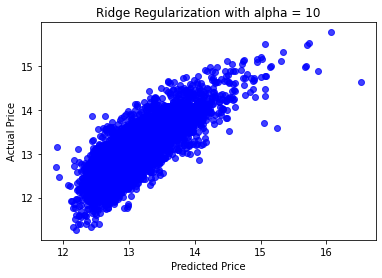

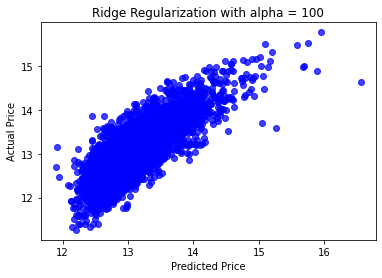

In [297]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    # print ('RMSE is: \n', mean_squared_error(y_test, predictions))
    overlay = ('R^2 is: {}\nRMSE is: {}'.format(
        
                    ridge_model.score(X_test, y_test),

                    mean_squared_error(y_test, preds_ridge)))
    
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

The plots show the actual vs predicted prices for varying alpha values.

# 4th Approach: Lasso Regression

In [224]:
# Before building the models, let's first scale data. 
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, this value depends on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.
# 

# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [225]:
# We can basically build the Lasso model. 
# But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X_train, y_train) 

# Print scores, Mean Squared Error, and coefficients
# 
print("lasso score:", lasso.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, lasso.predict(X_test))) 
print("lasso coef:", lasso.coef_) 

lasso score: -1.908986284382408e-05
lasso MSE: 0.2828064438511517
lasso coef: [ 0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]


Lasso regression reduces almost all coefficients to zero

In [226]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

#splitting data into training and test sets, and choose a set of parameters

X_train, X_test, y_train, y_test = train_test_split(A, b, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.5593240068923558
lasso MSE: 0.1223632374107666
lasso best estimator coef: [-0.00000000e+00  0.00000000e+00 -1.66463102e-07  0.00000000e+00
  0.00000000e+00  4.85673091e-02  1.65360048e-04 -2.87041982e-03
  6.09285139e-04  1.98728799e-04 -0.00000000e+00  0.00000000e+00]
linear coef: [-2.79359227e-02  7.84693885e-02  3.32668903e-08  1.03997364e-01
  4.40432951e-02  2.31635884e-01  1.52140579e-04 -5.36729378e-03
  2.20427980e-04  7.92417008e-05 -2.45530109e-01  2.45530109e-01]


Lasso regression yields an accuracy score of 55.9%

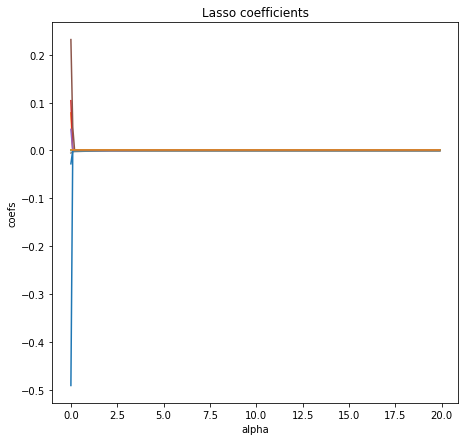

In [227]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 

import numpy as np

alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

# 5th Approach: Elastic-Net Regression

In [228]:
#importing the necessary libraries to use
from sklearn.linear_model import ElasticNet

In [229]:
regression=LinearRegression()
regression.fit(X_train,y_train)
first_model=(mean_squared_error(y_true=y_test,y_pred=regression.predict(X_test)))
print(first_model)

0.09855852282797185


In [230]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [231]:
search.fit(X_train,y_train)
search.best_params_
abs(search.best_score_)

0.09929457913413685

In [232]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 0.205 This is above our baseline model of MSE 1.05  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X_train,y_train)
elastic_model=elastic.score(X_test,y_test)
print(elastic_model)

0.2590866163530807


Elastic net regression has an accuracy of 25.9% hence it cannot be used for predictions

In [233]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X_test.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the same. 
# Notice that occupation was completely removed from the model in the elastic net version. 
# This means that this values was no good to the algorithm. Traditional regression cannot do this.

{'bathrooms': 0.03285297301235168,
 'bedrooms': 0.007133311912653315,
 'condition': 0.0,
 'floors': 0.0073146112238955925,
 'grade': 0.03753750477601422,
 'sqft_abv_living': 2.322043242624469e-05,
 'sqft_basement': 2.1061112404780766e-05,
 'sqft_lot': 0.0,
 'waterfront_0': -0.0,
 'waterfront_1': 0.0,
 'yr_built': -0.0,
 'zipcode': 0.0}

There are no patterns to explain the variances in the data.
The features are independent.

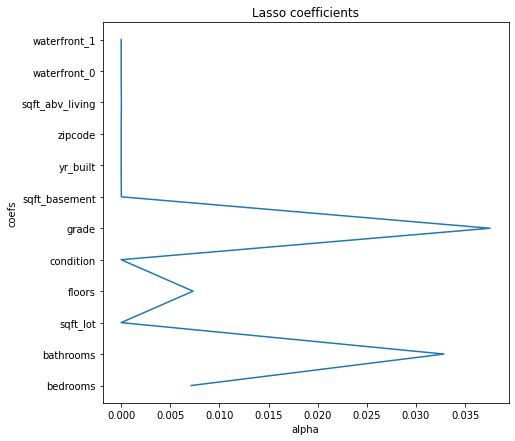

In [234]:
# Building Elastic net coefficient plots

plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot( elastic.coef_,X_test.columns)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

In [235]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X_test.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# Some coefficients have been reduced to zero and only 6 have coefficients. 
# Notice that occupation was completely removed from the model in the elastic net version. 
# This means that this values was no good to the algorithm. Traditional regression cannot do this.

{'bathrooms': 0.03285297301235168,
 'bedrooms': 0.007133311912653315,
 'condition': 0.0,
 'floors': 0.0073146112238955925,
 'grade': 0.03753750477601422,
 'sqft_abv_living': 2.322043242624469e-05,
 'sqft_basement': 2.1061112404780766e-05,
 'sqft_lot': 0.0,
 'waterfront_0': -0.0,
 'waterfront_1': 0.0,
 'yr_built': -0.0,
 'zipcode': 0.0}

## 9. Follow up questions

### a). Did we have the right data?
NO!

### b). Do we need other data to answer our question?
YES! More conclusive features should be included.

#Conclusion

Linear Regression and Lasso Regression yield accurate models and can be used for prediction.